In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hp 840 G5\Music\ML projects\spam detector\spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### DATA CLEANING

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df=df.rename(columns={'v1':'Target','v2':'Text' })
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
df.shape

(5169, 2)

### EDA

In [14]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [15]:
!pip install nltk

([<matplotlib.patches.Wedge at 0x1b241e57b50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'HAM'),
  Text(1.014499764949479, -0.4251943401757036, 'SPAM')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

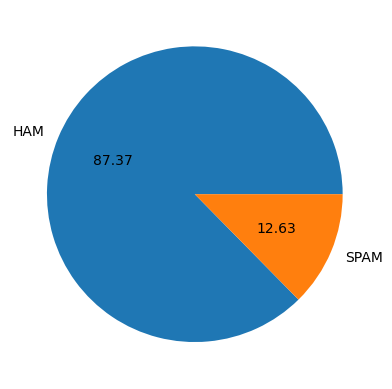

In [16]:
plt.pie(df['Target'].value_counts(), labels=['HAM', 'SPAM'], autopct='%0.2f')

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
import sys
print(sys.executable)

D:\softwares\python.exe


In [20]:
import nltk
print(nltk.__version__)

3.8.2


In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Hp 840
[nltk_data]     G5/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['NumOfChar']=df['Text'].apply(len)
df.head()

,Target,Text,NumOfChar
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['Text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [24]:
df['NumOfWords']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Target,Text,NumOfChar,NumOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['Text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [26]:
df['NumOfSentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,NumOfChar,NumOfWords,NumOfSentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['NumOfChar','NumOfWords','NumOfSentence']].describe()

,NumOfChar,NumOfWords,NumOfSentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#HAM
df[df['Target']==0][['NumOfChar', 'NumOfWords', 'NumOfSentence']].describe()

,NumOfChar,NumOfWords,NumOfSentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#SPAM
df[df['Target']==1][['NumOfChar', 'NumOfWords', 'NumOfSentence']].describe()

,NumOfChar,NumOfWords,NumOfSentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='NumOfChar', ylabel='Count'>

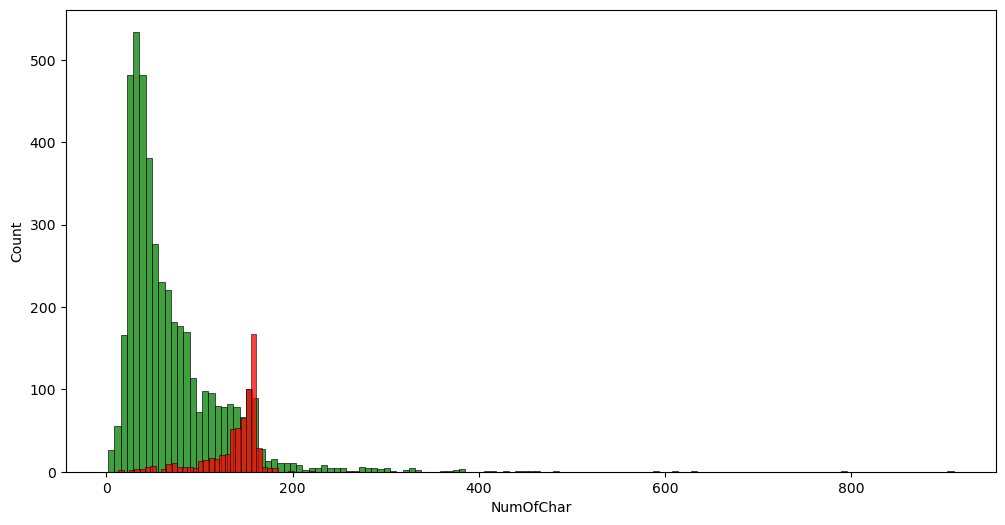

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['NumOfChar'], color='green')
sns.histplot(df[df['Target']==1]['NumOfChar'], color='red')

<Axes: xlabel='NumOfWords', ylabel='Count'>

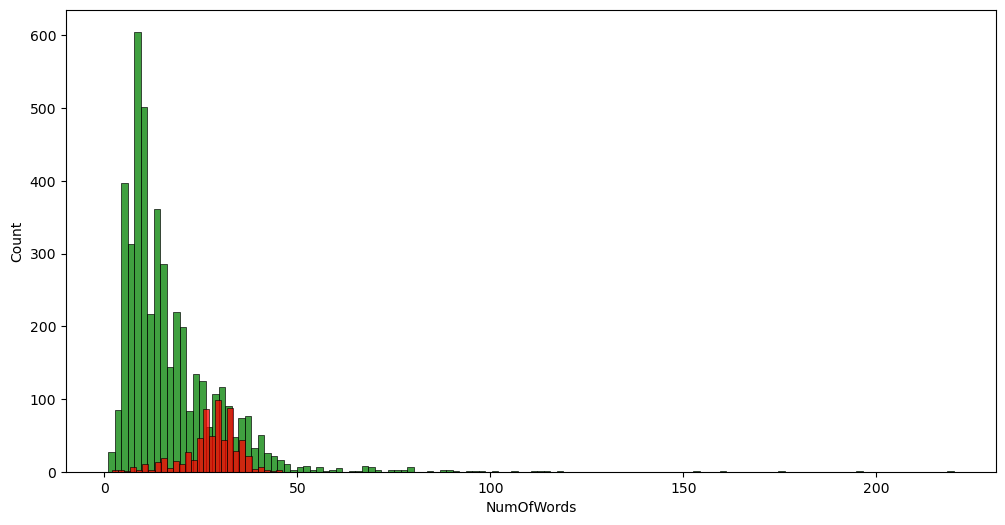

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['NumOfWords'], color='green')
sns.histplot(df[df['Target']==1]['NumOfWords'], color='red')

<Axes: xlabel='NumOfSentence', ylabel='Count'>

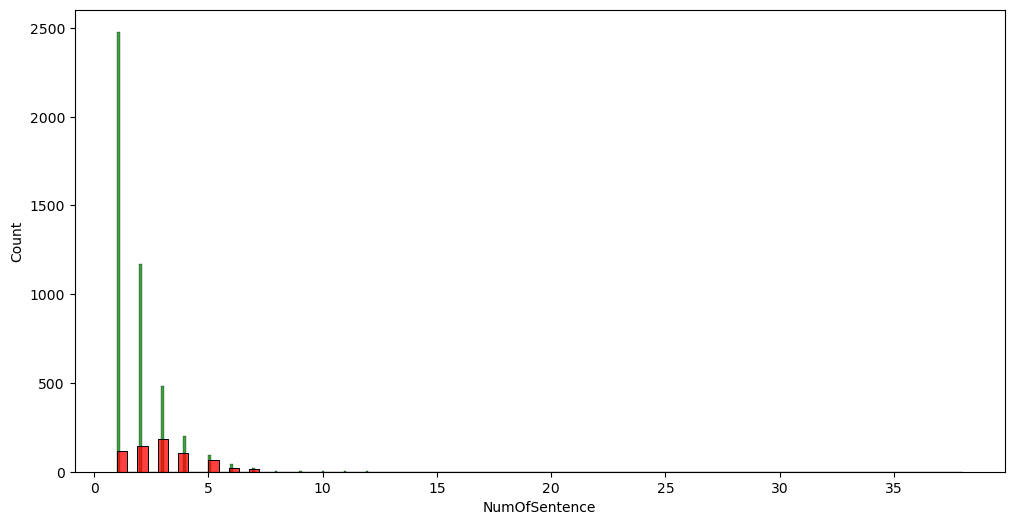

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['NumOfSentence'], color='green')
sns.histplot(df[df['Target']==1]['NumOfSentence'], color='red')

D:\softwares\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


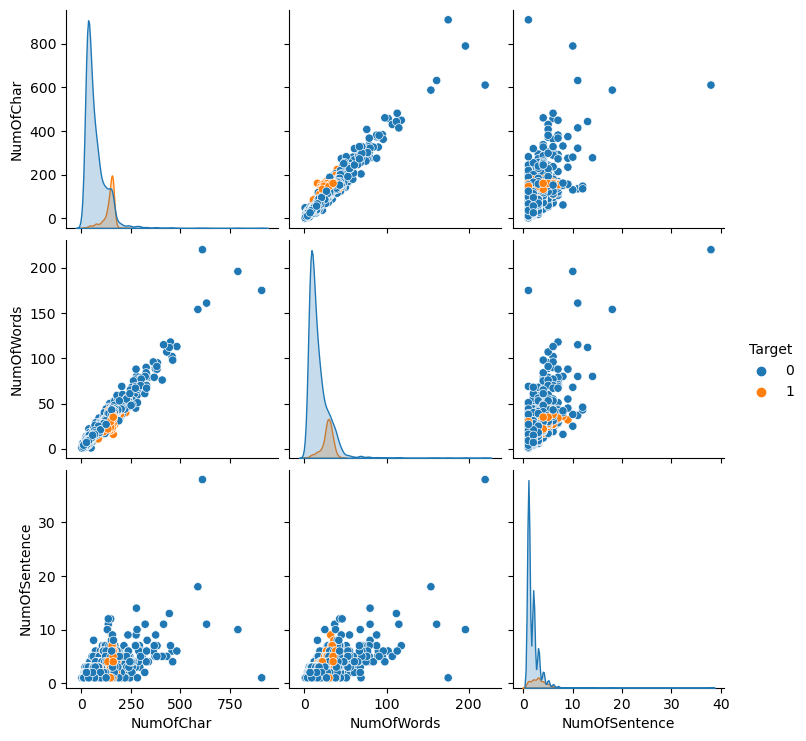

In [33]:
#correlation bw columns
sns.pairplot(df, hue='Target')

<Axes: >

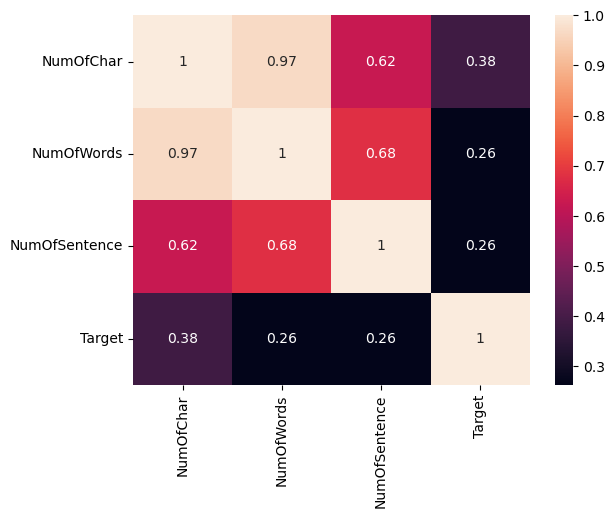

In [34]:
sns.heatmap(df[['NumOfChar', 'NumOfWords', 'NumOfSentence','Target']].corr(), annot=True)

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Hp 840
[nltk_data]     G5/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('crying')

'cri'

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#converting text to lowercase, stemming, removing punctuations, tokenization, removing special chars and stop words
def transforming_text(text):
    #lowercase
    text= text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    
    #removing special chars
    y=[]
    for i in text:
        if i.isalnum():
           y.append(i)
        text=y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
        text=y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
            
            
    return " ".join(y)


In [39]:
transforming_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
df['transformed_text']=df['Text'].apply(transforming_text)
df.head()

,Target,Text,NumOfChar,NumOfWords,NumOfSentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
!pip install wordcloud

In [43]:
#wordcloud shows important words highlighted
from wordcloud import WordCloud

In [44]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [45]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

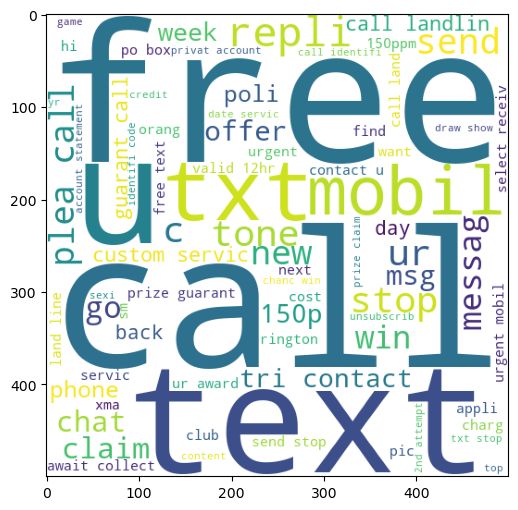

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

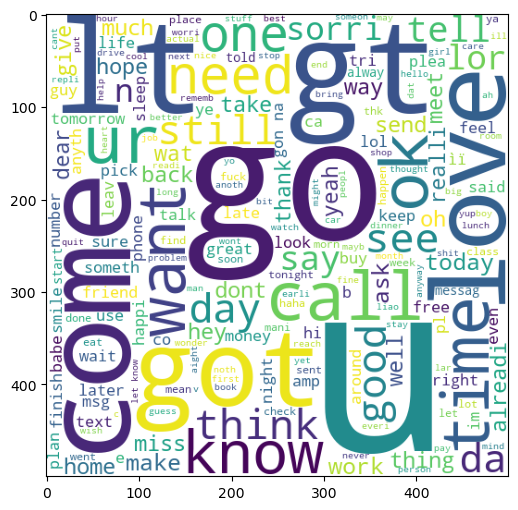

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,Target,Text,NumOfChar,NumOfWords,NumOfSentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### MODEL BUILDING

In [50]:
#Naive bayes best for textual data

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [51]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
#from sklearn.preprocessign import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [53]:
#appending the NumOfChar column to X
#X=np.hstack((X, df['NumOfChar'].values.reshape(-1,1)))

In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
X.shape

(5169, 3000)

In [56]:
Y=df['Target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [60]:
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8723404255319149
0.5137614678899083
[[790 106]
 [ 26 112]]


In [61]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(precision_score(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

1.0
0.971953578336557
[[896   0]
 [ 29 109]]


In [62]:
bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(precision_score(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.991869918699187
0.9835589941972921
[[895   1]
 [ 16 122]]


In [63]:
# tfidfvectorixer and mnb used

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [65]:
LR=LogisticRegression(solver='liblinear')
mnb=MultinomialNB()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
svm=SVC(kernel='sigmoid', gamma=1.0)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)

In [66]:
clfs={
    'SVC':svm,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':LR,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbc
}

In [67]:
def training_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    return accuracy, precision

In [68]:
training_classifier(svm, x_train, x_test, y_train, y_test)

(0.97678916827853, 0.975)

In [69]:
precision_scores=[]
accuracy_scores=[]
for name, clf in clfs.items():
    current_accuracy, current_precision=training_classifier(clf, x_train, x_test, y_train, y_test)
    print('for', name)
    print('Accuracy', current_accuracy)
    print('Precision', current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
Accuracy 0.97678916827853
Precision 0.975
for KN
Accuracy 0.9061895551257253
Precision 1.0
for NB
Accuracy 0.971953578336557
Precision 1.0
for DT
Accuracy 0.9294003868471954
Precision 0.8350515463917526
for LR
Accuracy 0.9555125725338491
Precision 0.9791666666666666
for RF
Accuracy 0.9738878143133463
Precision 0.9826086956521739
for AdaBoost
Accuracy 0.9661508704061895
Precision 0.9557522123893806
for Bgc
Accuracy 0.9564796905222437
Precision 0.8604651162790697
for ETC
Accuracy 0.9787234042553191
Precision 0.9754098360655737
for GBDT
Accuracy 0.9497098646034816
Precision 0.9387755102040817


In [70]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.971954,1.000000
5,RF,0.973888,0.982609
4,LR,0.955513,0.979167
8,ETC,0.978723,0.975410
0,SVC,0.976789,0.975000
6,AdaBoost,0.966151,0.955752
9,GBDT,0.949710,0.938776
7,Bgc,0.956480,0.860465
3,DT,0.929400,0.835052


In [72]:
performance_df1=pd.melt(performance_df, id_vars='Algorithm')

In [73]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.973888
3,LR,Accuracy,0.955513
4,ETC,Accuracy,0.978723
5,SVC,Accuracy,0.976789
6,AdaBoost,Accuracy,0.966151
7,GBDT,Accuracy,0.949710
8,Bgc,Accuracy,0.956480
9,DT,Accuracy,0.929400


D:\softwares\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


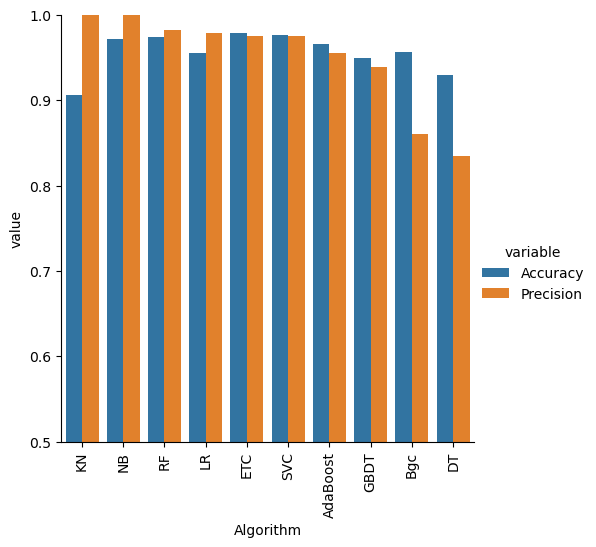

In [74]:
sns.catplot(x='Algorithm',y='value',hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
#improving model by applying max_feature parameter to tfidf --> 3000 max feature== using 3000 most used words only 

In [76]:
temp_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_feature_3000':accuracy_scores, 'Precision_max_feature_3000': precision_scores})

In [77]:
#temp_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores, 'Precision_scaling':precision_scores})

In [78]:
new_df=performance_df.merge(temp_df, on='Algorithm')

In [79]:
#scaled_df=performance_df.merge(new_df, on='Algorithm')

In [80]:
#scaled_df

In [81]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_feature_3000,Precision_max_feature_3000
0,KN,0.906190,1.000000,0.906190,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,LR,0.955513,0.979167,0.955513,0.979167
4,ETC,0.978723,0.975410,0.978723,0.975410
5,SVC,0.976789,0.975000,0.976789,0.975000
6,AdaBoost,0.966151,0.955752,0.966151,0.955752
7,GBDT,0.949710,0.938776,0.949710,0.938776
8,Bgc,0.956480,0.860465,0.956480,0.860465
9,DT,0.929400,0.835052,0.929400,0.835052


In [82]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))